Step 1: Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import random


Step 2: Define the Environment

In [29]:
class CryptoEnv:
    def __init__(self, price_data):
        self.price_data = price_data
        self.n_steps = len(price_data)
        self.current_step = 0
        self.done = False
        self.position = 0  # 0: no position, 1: long, -1: short
        self.initial_balance = 10000
        self.balance = self.initial_balance
        self.portfolio_value = self.initial_balance

    def reset(self):
        self.current_step = 0
        self.done = False
        self.position = 0
        self.balance = self.initial_balance
        self.portfolio_value = self.initial_balance
        return self._get_observation()

    def _get_observation(self):
        return self.price_data[self.current_step], self.position

    def step(self, action):
        # Actions: 0: hold, 1: long, 2: short
        reward = 0
        if action == 1 and self.position != 1:
            self.position = 1
            self.portfolio_value += self.price_data[self.current_step] - self.price_data[self.current_step - 1]
        elif action == 2 and self.position != -1:
            self.position = -1
            self.portfolio_value -= self.price_data[self.current_step] - self.price_data[self.current_step - 1]
        elif action == 0:
            self.portfolio_value += 0

        self.balance = self.portfolio_value

        self.current_step += 1
        if self.current_step >= self.n_steps:
            self.done = True

        return self._get_observation(), reward, self.done, {}

    def render(self):
        print(f'Step: {self.current_step}, Position: {self.position}, Balance: {self.balance}')


Step 3: Define the Q-learning Agent

In [30]:
class QLearningAgent:
    def __init__(self, action_space, state_space, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.action_space = action_space
        self.state_space = state_space
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.q_table = defaultdict(lambda: np.zeros(action_space))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(range(self.action_space))
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state][action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (target - predict)


Step 4: Train the Agent

In [31]:
class CryptoEnv:
    def __init__(self, price_data):
        self.price_data = price_data
        self.n_steps = len(price_data)
        self.current_step = 0
        self.done = False
        self.position = 0  # 0: no position, 1: long, -1: short
        self.initial_balance = 10000
        self.balance = self.initial_balance
        self.portfolio_value = self.initial_balance

    def reset(self):
        self.current_step = 0
        self.done = False
        self.position = 0
        self.balance = self.initial_balance
        self.portfolio_value = self.initial_balance
        return self._get_observation()

    def _get_observation(self):
        # Ensure current_step is within bounds
        if self.current_step < self.n_steps:
            return self.price_data[self.current_step], self.position
        else:
            return None, self.position  # Or handle the out-of-bounds situation differently

    def step(self, action):
        # Actions: 0: hold, 1: long, 2: short
        reward = 0
        if action == 1 and self.position != 1:
            self.position = 1
            # Avoid accessing out-of-bounds index when current_step is 0
            if self.current_step > 0:
                self.portfolio_value += self.price_data[self.current_step] - self.price_data[self.current_step - 1]
        elif action == 2 and self.position != -1:
            self.position = -1
            # Avoid accessing out-of-bounds index when current_step is 0
            if self.current_step > 0:
                self.portfolio_value -= self.price_data[self.current_step] - self.price_data[self.current_step - 1]
        elif action == 0:
            self.portfolio_value += 0

        self.balance = self.portfolio_value

        self.current_step += 1
        if self.current_step >= self.n_steps:
            self.done = True

        return self._get_observation(), reward, self.done, {}

    def render(self):
        print(f'Step: {self.current_step}, Position: {self.position}, Balance: {self.balance}')

Step 5: Evaluate the Agent

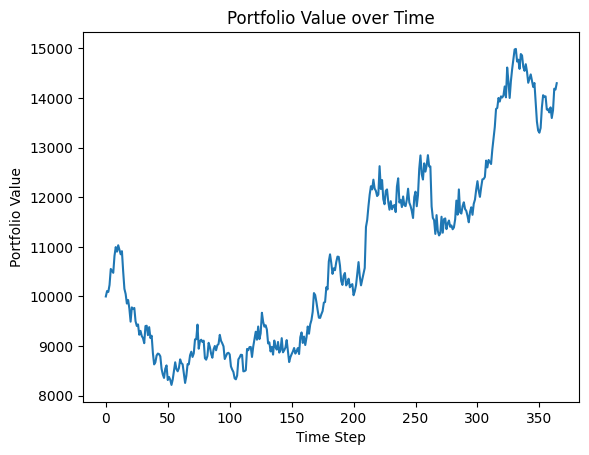

In [32]:
# Visualization 1: Plot portfolio value over time
plt.plot([i for i in range(env.n_steps)], [env.price_data[i] for i in range(env.n_steps)])
plt.xlabel('Time Step')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value over Time')
plt.show()


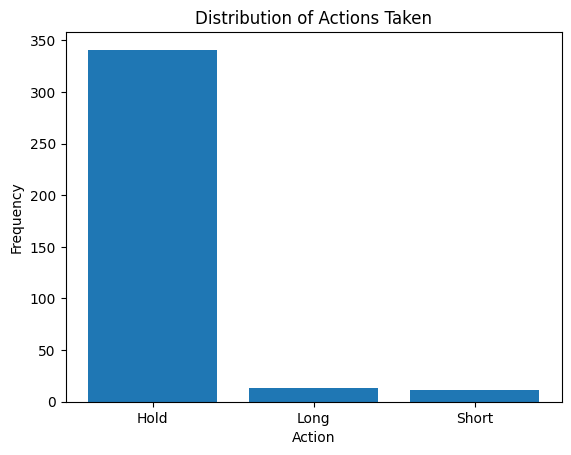

In [33]:
plt.hist(actions_taken, bins=range(agent.action_space + 1), align='left', rwidth=0.8)
plt.xticks(range(agent.action_space), ['Hold', 'Long', 'Short'])
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Distribution of Actions Taken')
plt.show()